<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Problem:</font></h2>

In this project, we examine the "UCI Online Retail II" dataset, capturing transactions from a __UK-based online retailer__ from December 2009 to December 2011. This unique dataset provides insights into a niche market of all-occasion gift-ware, primarily serving wholesale customers.

Our objective is to enhance marketing strategies and increase sales by leveraging data analytics. We intend to transform the extensive sales data into actionable insights through customer segmentation. By applying the __K-means clustering technique__, we will identify distinct customer groups, enabling targeted and more effective marketing approaches.

Furthermore, we aim to develop a tailored recommendation system. This system will identify and suggest top-selling and yet-to-be-purchased items to distinct customer segments. This approach is expected to not only improve customer satisfaction but also drive higher sales by promoting products more aptly suited to each customer's preferences.

Embark with us as we apply sophisticated data analysis techniques to uncover new opportunities in e-commerce and elevate the retail experience.

Data set available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/502/online+retail+ii)

<a id="load_dataset"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#9B60A1; font-size:200%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 1 |</span><span style='color: #9B60A;'> Loading the Dataset</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>


<a id="libraries"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 1.1 |</span><span style='color:#9B60A1;'> Importing Necessary Libraries</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>




In [1]:
# Data Handling
#===================
import numpy as np
import pandas as pd

# Visualization
#===================
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
import plotly.graph_objects as go
from matplotlib import patches

# Statistical Analysis
#===================
from scipy.stats import linregress

# Preprocessing
#===================
from sklearn.preprocessing import StandardScaler

# Model Selection
#===================
from sklearn.ensemble import IsolationForest

# Dimensionality Reduction
#===================
from sklearn.decomposition import PCA

# Clustering
#===================
from sklearn.cluster import KMeans

# Model Evaluation
#===================
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Visualization Tools
#===================
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Data Presentation
#===================
from tabulate import tabulate
from collections import Counter

# Warnings
#===================
import warnings
warnings.filterwarnings('ignore')

<a id="load_dataset"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 1.2 |</span><span style='color:#9B60A1;'> Loading the Dataset</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [2]:
path = '/kaggle/input/uci-online-retail-ii-data-set/online_retail_II.xlsx'
df_2009 = pd.read_excel(path, sheet_name = 'Year 2009-2010')
df_2010 = pd.read_excel(path, sheet_name = 'Year 2010-2011')


In [3]:
# Merge the sheets
df_original = pd.concat([df_2009, df_2010], ignore_index=True) 

# Delete unnecessary data
del df_2009
del df_2010 

# Copy dataframe to preserve original
df = df_original.copy()

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<a id="load_dataset"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#9B60A1; font-size:200%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 2 |</span><span style='color: #9B60A;'> Overview and Data Wrangling</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Approach:</font></h2>

In this stage, we will take a look at our data first. Afterwards we will eliminate duplicates, then look at the distribution of Null values across columns and discuss approaches to handle them. Next, we will ensure data types and values are consistent. Following that, we will apply a logic test, as negative or zero values in the 'Price' and 'Quantity' columns seem illogical. Finally, we will create some new columns to facilitate our analysis.

<a id="overview"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 2.1 |</span><span style='color:#9B60A1;'> Overview</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [4]:
print("#" * 50)
print(" " * 15, "Dataset Information")
print("#" * 50)
print("The Dataset has {} columns and {} rows.".format(df.shape[1], df.shape[0]))
print("The DataFrame has {} duplicated values and {} missing values.".format(df.duplicated().sum(), df.isnull().sum().sum()))
print(df.info())

##################################################
                Dataset Information
##################################################
The Dataset has 8 columns and 1067371 rows.
The DataFrame has 34335 duplicated values and 247389 missing values.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None


<a id="Duplicates"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 1.2 |</span><span style='color:#9B60A1;'> Data Wrangling(Handling Duplicates)</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [5]:
df.drop_duplicates(inplace=True)

<a id="Nulls"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 1.3 |</span><span style='color:#9B60A1;'> Data Wrangling(Handling Missing Values)</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [6]:
print("#" * 30)
print(" " * 5, "Null Distribution")
print("#" * 30)
null = df.isnull().sum().to_frame().rename(columns = {0:'count'})
null['%'] = (null['count'] / len(df)) * 100.
null = null.sort_values(by = '%', ascending = False)
null.style.background_gradient(cmap = 'PRGn')

##############################
      Null Distribution
##############################


,count,%
Customer ID,235151,22.763098
Description,4275,0.413829
Invoice,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
Price,0,0.000000
Country,0,0.000000


In [7]:
df.dropna(subset=['Customer ID', 'Description'], inplace=True)

<a id="Consistency"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 1.4 |</span><span style='color:#9B60A1;'> Data Wrangling(Ensuring Consistency)</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [8]:
df['Customer ID'] = df['Customer ID'].astype('int')
df['Description'] = df['Description'].str.lower()
df['Country'] = df['Country'].str.lower()

In [9]:
# Find the number of numeric characters in each stock code
unique_stock_codes = df['StockCode'].unique()
num_char_counts = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

print("Counts of Numeric Char. Frequencies In Stock Codes:")
print("-"*50)
print(num_char_counts)

Counts of Numeric Char. Frequencies In Stock Codes:
--------------------------------------------------
5    4633
0       8
1       2
3       2
4       1
Name: count, dtype: int64


In [10]:
df['NumNumericChars'] = df['StockCode'].apply(lambda x: sum(c.isdigit() for c in str(x)))
df = df[df['NumNumericChars'] == 5]
df.drop(columns=['NumNumericChars'], inplace=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085,united kingdom
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085,united kingdom
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085,united kingdom
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085,united kingdom
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085,united kingdom
...,...,...,...,...,...,...,...,...
1067365,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,france
1067366,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,france
1067367,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,france
1067368,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,france


<a id="LogicalTest"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 1.5 |</span><span style='color:#9B60A1;'> Data Wrangling(Applying Logical Tests)</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [11]:
def columns_mustbe_positive(data, column):
    """
    Converts negative values to positive and removes zero values in a specific column.

    Args:
    data (DataFrame): The dataset to be processed.
    column (str): The name of the column to be processed.
    """
    # Take the absoulate values
    data[column] = data[column].abs()
    
    # Remove zero values
    data = data[data[column] != 0]
    print("Corrected {} column: \n".format(column))
    print(data[column].describe())
    return data

columns_mustbe_positive(df, 'Price')
columns_mustbe_positive(df, 'Quantity')

Corrected Price column: 

count    794163.000000
mean          2.971414
std           4.475020
min           0.030000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: Price, dtype: float64
Corrected Quantity column: 

count    794223.000000
mean         13.822012
std         191.998336
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085,united kingdom
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085,united kingdom
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085,united kingdom
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085,united kingdom
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085,united kingdom
...,...,...,...,...,...,...,...,...
1067365,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,france
1067366,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,france
1067367,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,france
1067368,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,france


<a id="NewColumns"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 1.6 |</span><span style='color:#9B60A1;'> Data Wrangling(Creating New Columns)</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Change the column name
df.rename(columns={'InvoiceDate': 'Date'}, inplace=True)

# 'Year', 'Month', ve 'Day_Of_The_Week' columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_Of_The_Week'] = df['Date'].dt.dayofweek

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day_Of_The_Week_Name'] = df['Day_Of_The_Week'].apply(lambda x: day_names[x])

df['Is_Weekend'] = df['Day_Of_The_Week'].apply(lambda x: 1 if x >= 5 else 0)

df

,Invoice,StockCode,Description,Quantity,Date,Price,Customer ID,Country,Year,Month,Day_Of_The_Week,Day_Of_The_Week_Name,Is_Weekend
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085,united kingdom,2009,12,1,Tuesday,0
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085,united kingdom,2009,12,1,Tuesday,0
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085,united kingdom,2009,12,1,Tuesday,0
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085,united kingdom,2009,12,1,Tuesday,0
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085,united kingdom,2009,12,1,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,france,2011,12,4,Friday,0
1067366,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,france,2011,12,4,Friday,0
1067367,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,france,2011,12,4,Friday,0
1067368,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,france,2011,12,4,Friday,0


<a id="eda"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#9B60A1; font-size:200%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 3 |</span><span style='color: #9B60A;'> Exploratory Data Analysis</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Approach:</font></h2>

In this step, we will sequentially visualize the 'Price', 'Distribution' columns, then the date-related columns, and finally the distribution by countries.

<a id="PriceDistribution"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 3.1 |</span><span style='color:#9B60A1;'> Price Distribution </span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

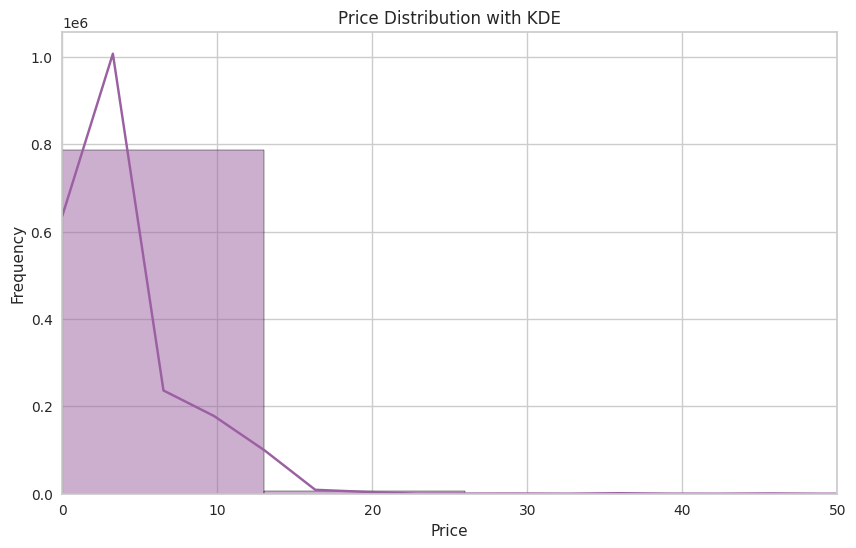

In [13]:
# Histogram for Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True, color='#9B60A1') 
plt.title('Price Distribution with KDE')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.show()


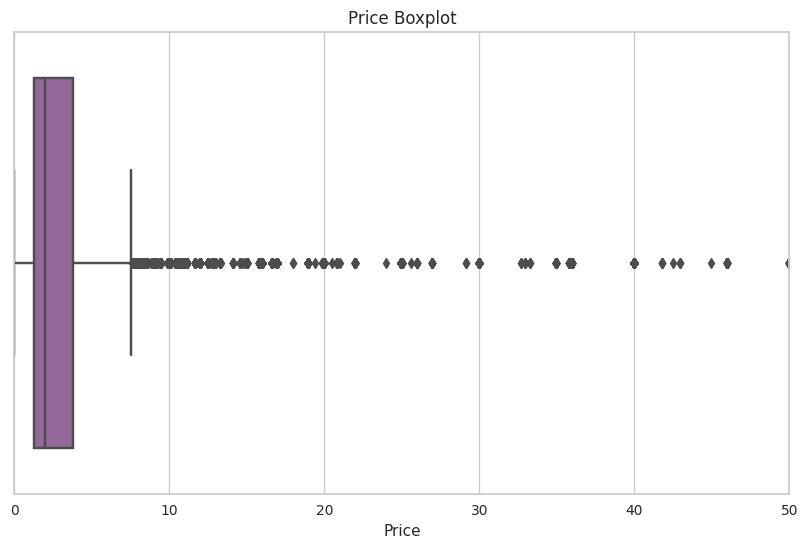

In [14]:
# Boxplot for Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'], color='#9B60A1')
plt.title('Price Boxplot')
plt.xlabel('Price')
plt.xlim(0, 50) 
plt.show()

In [15]:
# Create columns for outlier check
def mark_outliers(val):
    Q1 = val.quantile(0.25)
    Q3 = val.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (val < lower_bound) | (val > upper_bound)

# 'Price_Outlier' column
df['Price_Outlier'] = mark_outliers(df['Price']).astype(int)

# 'Quantity_Outlier' column
df['Quantity_Outlier'] = mark_outliers(df['Quantity']).astype(int)

<a id="DescriptionsDistribution"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 3.2 |</span><span style='color:#9B60A1;'> Descriptions Distribution </span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

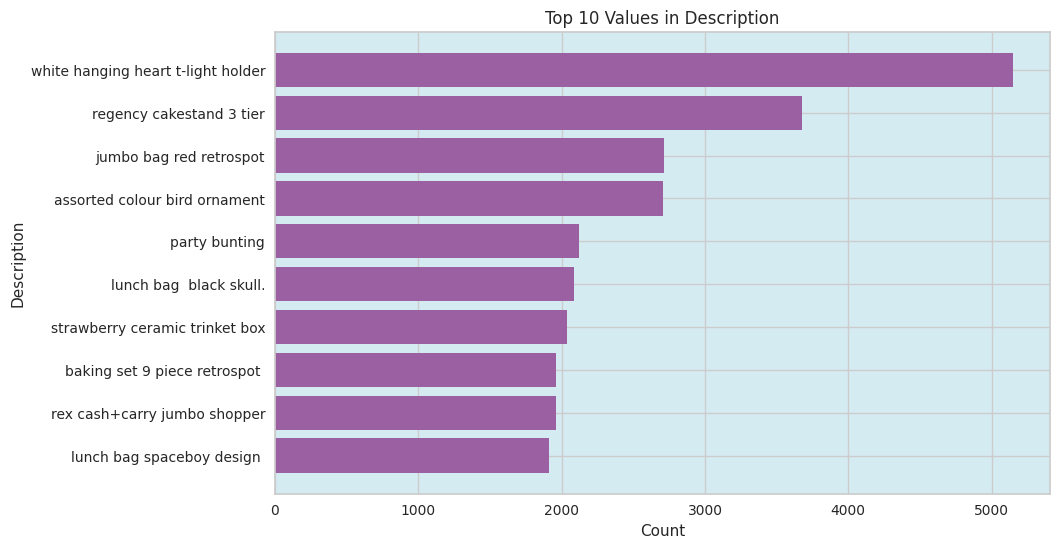

In [16]:
def bar_plot_top_values(data, column, top_n=10, ascending=False, orientation='horizontal'):
    """
    Visualizes the most frequent values and their counts in a given column using a bar chart.

    Args:
    data (DataFrame): The dataset to be processed.
    column (str): The name of the column to be used in the chart.
    top_n (int, optional): The number of top values to display. Defaults to 10.
    ascending (bool, optional): Whether to reverse the order of the data. Defaults to False.
    orientation (str, optional): The orientation of the bar chart 'horizontal' or 'vertical'. Defaults to 'horizontal'.
    """
    # Count value
    top_values = data[column].value_counts().nlargest(top_n)
    
    plt.figure(figsize=(10, 6))
    
    if orientation == 'horizontal':
        plt.barh(top_values.index.astype(str), top_values.values, color='#9B60A1')
        plt.xlabel('Count')
        plt.ylabel(column)
        plt.gca().invert_yaxis()  # Sort the bars from highest to lowest value
    elif orientation == 'vertical':
        plt.bar(top_values.index.astype(str), top_values.values, color='#9B60A1')
        plt.xlabel(column)
        plt.ylabel('Count')
        
    # Background color
    plt.gca().set_facecolor((173/255, 216/255, 230/255, 0.5))
    
    # Set title
    plt.title(f'Top {top_n} Values in {column}')
    
    # Show
    plt.show()

bar_plot_top_values(df, 'Description', 10)


<a id="DateDistribution"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 3.3 |</span><span style='color:#9B60A1;'> Date-related Distributions </span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

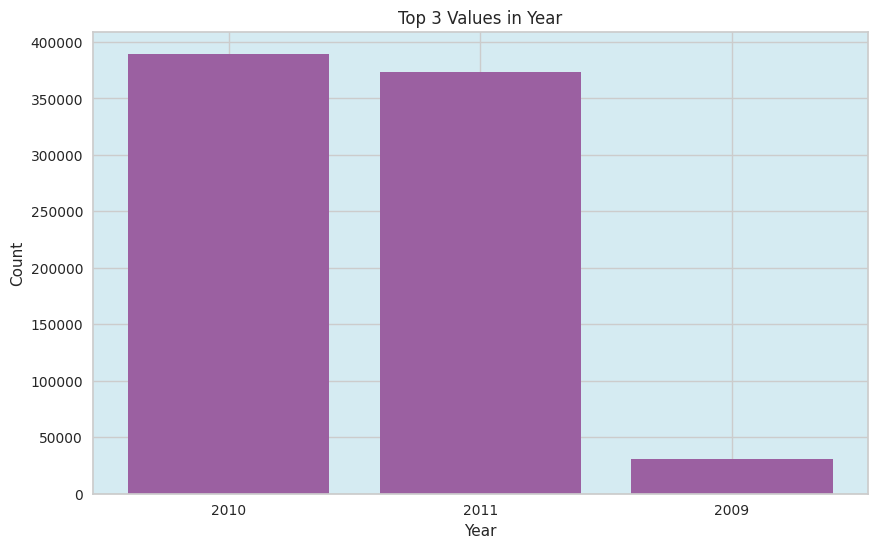

In [17]:
bar_plot_top_values(df, 'Year', 3, orientation='vertical')

In [18]:
# Explore Date Columns

date_columns = ['Month', 'Day_Of_The_Week_Name','Is_Weekend']

# Create a DataFrame from date columns with their unique values
cat_feature_info = pd.DataFrame(columns=['Feature', 'Unique_Values'])
for cat_feat in date_columns:
    unique_values = df[cat_feat].unique()
    cat_feature_info = pd.concat([cat_feature_info, pd.DataFrame({'Feature': cat_feat, 'Unique_Values': [unique_values]})], ignore_index=True)

display(cat_feature_info)

,Feature,Unique_Values
0,Month,"[12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]"
1,Day_Of_The_Week_Name,"[Tuesday, Wednesday, Thursday, Friday, Saturda..."
2,Is_Weekend,"[0, 1]"


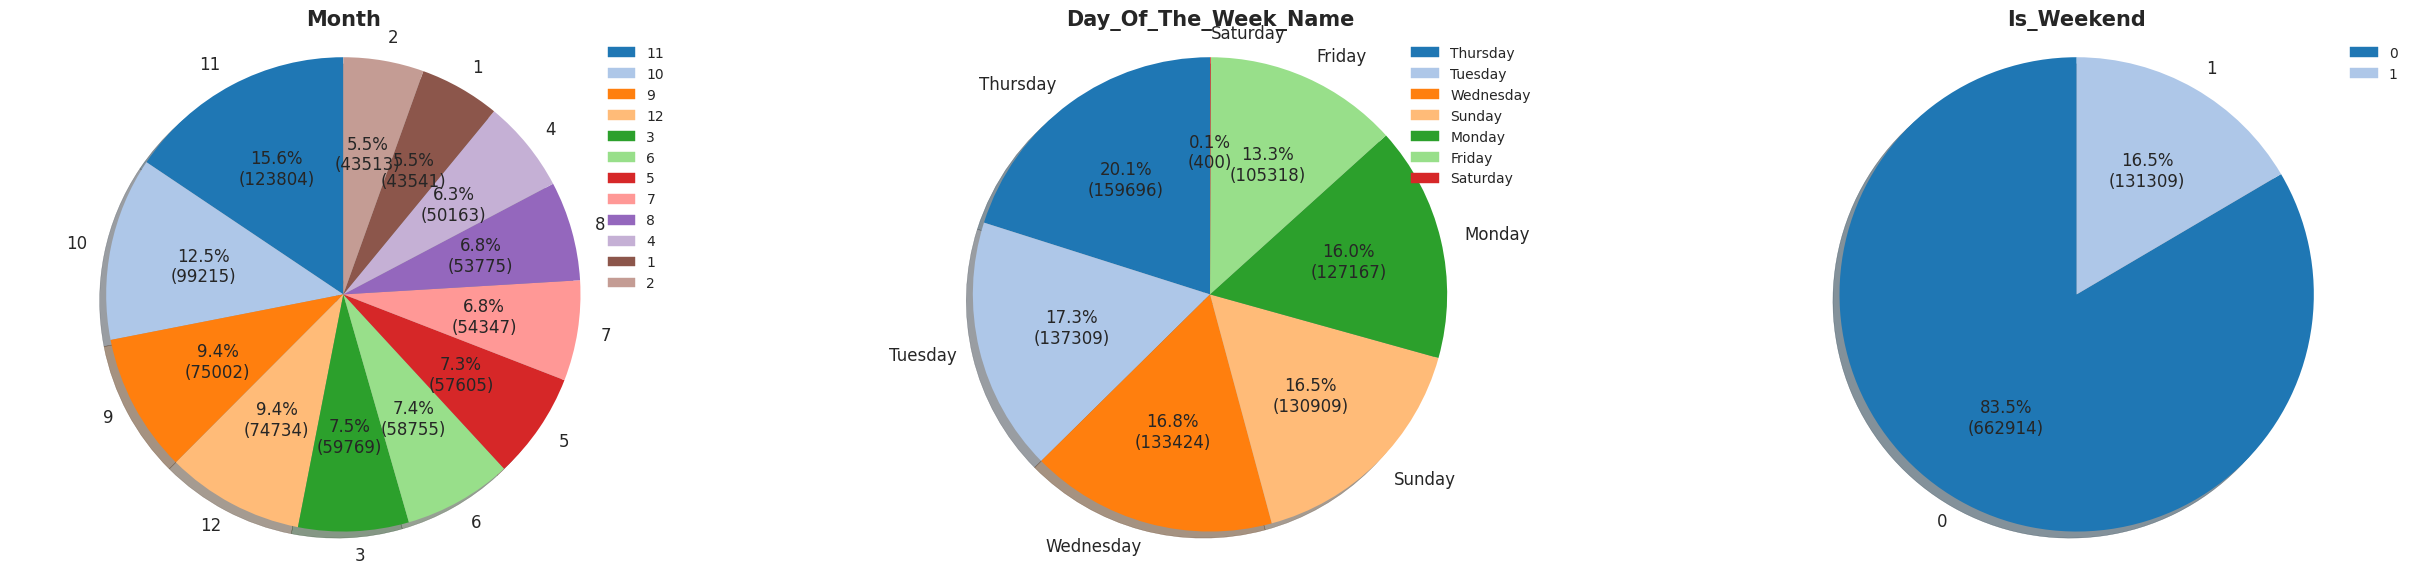

In [19]:
# Visualize Date Columns ( Pie Chart )

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

yes_color = '#FF6666'  
no_color = '#6699FF'  


fig, ax = plt.subplots(nrows=(len(date_columns) // 3) + 1, ncols=3, figsize=(30, 60))
ax = ax.flat

for i, cat_feat in enumerate(date_columns):
    df_class = df[cat_feat].value_counts()
    labels = df_class.index.tolist()
    values = df_class.values.tolist()
    unique_labels = len(labels)  
    colors = [yes_color if label == 'Yes' else no_color if label == 'No' else plt.cm.tab20(j % 20) for j, label in enumerate(labels)]
    
    legend_elements = [patches.Patch(color=colors[j], label=labels[j]) for j in range(len(labels))]
    legend_elements = sorted(legend_elements, key=lambda x: labels[legend_elements.index(x)] != 'Yes', reverse=True)

    ax[i].pie(values, labels=labels, autopct=autopct_fun(values), shadow=True, startangle=90,
              colors=colors, textprops={'fontsize': 12})
    ax[i].set_title(f"{cat_feat}", fontsize=15, fontweight="bold")
    ax[i].axis('equal')
    ax[i].legend(handles=legend_elements, loc='best')

for j in range(i + 1, len(ax)):
    ax[j].set_visible(False)

plt.subplots_adjust(left=0.1, right=0.9, top=0.3, bottom=0.1, hspace=0.3, wspace=0.3)
plt.show()



<a id="CountryDistribution"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 3.4 |</span><span style='color:#9B60A1;'> Country Distributions </span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

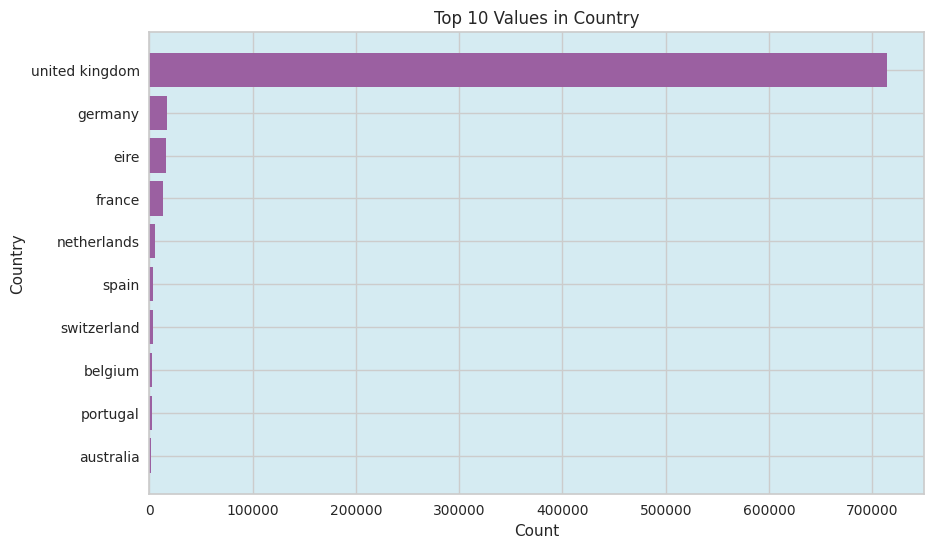

In [20]:
bar_plot_top_values(df, 'Country', 10, orientation='horizontal')

In [21]:
df['isUK'] = (df['Country'] == 'united kingdom').astype(int)

<a id="FeatureEngineering"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#9B60A1; font-size:200%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 4 |</span><span style='color: #9B60A;'> Feature Engineering </span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Approach:</font></h2>

In this stage of feature engineering for our customer segmentation project, we will group data by individual customers since our main dataset contains multiple invoices per customer. This approach is crucial to capture accurate forecasts and patterns. We will aggregate the data related to the same customers to create a comprehensive 'customers' dataset. Here is what we will do in the code:

1. __Create Customer Profile Function:__ We will define a function create_customer_profile(df) to transform the raw dataset into a structured format that is suitable for analysis.
2. __Date Processing:__ We will normalize the 'Date' field to extract only the date part and calculate the most recent transaction date for each customer.
3. __Days Since Last Purchase:__ We will calculate the number of days that have elapsed since each customer's last purchase by comparing the last purchase date to the most recent date available in the dataset.
4. __Transaction Counts:__ We will determine the total number of unique transactions (invoices) for each customer.
5. __Total Products Purchased:__ We will sum up the total quantity of products purchased by each customer.
Total Spend Calculation: We will calculate each customer's total expenditure by multiplying the 'Price' by the 'Quantity' for each transaction and summing this across all their transactions.
6. __Average Transaction Value:__ We will calculate this metric by dividing the total spend by the number of transactions for each customer.
7. __Unique Products:__ We will count the number of unique products bought by each customer.
8. __Time Analysis:__ We will extract the day of the week and hour from each transaction to analyze shopping patterns.
9. __Average Days Between Purchases:__ We will calculate the average interval between purchases for each customer.
10. __Favorite Shopping Day and Hour:__ We will identify the most common day of the week and hour for shopping for each customer.
11. __Customer Geography:__ We will determine whether each customer is from the UK.
12. __Feature Merging:__ We will merge all these newly calculated features into the comprehensive 'customers' dataframe.
13. __Time of Day Analysis:__ Based on the most common shopping hour, we will classify the preferred shopping time of day (Morning, Afternoon, Evening, Night) for each customer.
14. __Seasonal Buying Patterns:__ We will calculate the mean and standard deviation of monthly spending for each customer to understand their seasonal buying behaviors.
15. __Spending Trend Analysis:__ We will analyze the trend in each customer's monthly spending to determine whether it is increasing, decreasing, or remaining stable over time.

<a id="CustomersDF"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 4.1 |</span><span style='color:#9B60A1;'> Creating DataFrame for Customers </span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [22]:
def create_customer_profile(df):
    df['Day'] = df['Date'].dt.normalize() 

    customers = df.groupby('Customer ID')['Day'].max().reset_index()
    most_recent_date = df['Day'].max()
    customers['Day'] = pd.to_datetime(customers['Day'])
    most_recent_date = pd.to_datetime(most_recent_date)
    customers['Days_Since_Last_Purchase'] = (most_recent_date - customers['Day']).dt.days

    total_transactions = df.groupby('Customer ID')['Invoice'].nunique().reset_index()
    total_transactions.rename(columns={'Invoice': 'Total_Transactions'}, inplace=True)
    total_products_purchased = df.groupby('Customer ID')['Quantity'].sum().reset_index()
    total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

    df['Total_Spend'] = df['Price'] * df['Quantity']
    total_spend = df.groupby('Customer ID')['Total_Spend'].sum().astype('int64').reset_index()
    average_transaction_value = total_spend.merge(total_transactions, on='Customer ID')
    average_transaction_value['Average_Transaction_Value'] = (average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']).astype('int64')

    unique_products_purchased = df.groupby('Customer ID')['StockCode'].nunique().reset_index()
    unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

    df['Day_Of_Week'] = df['Date'].dt.dayofweek
    df['Hour'] = df['Date'].dt.hour
    
    days_between_purchases = df.groupby('Customer ID')['Day'].apply(
        lambda x: (x.sort_values().diff().dropna()).dt.days
    )
    average_days_between_purchases = days_between_purchases.groupby('Customer ID').mean().reset_index()
    average_days_between_purchases.rename(columns={'Day': 'Average_Days_Between_Purchases'}, inplace=True)

    favorite_shopping_day = df.groupby(['Customer ID', 'Day_Of_Week']).size().reset_index(name='Count')
    favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('Customer ID')['Count'].idxmax()][['Customer ID', 'Day_Of_Week']]

    favorite_shopping_hour = df.groupby(['Customer ID', 'Hour']).size().reset_index(name='Count')
    favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('Customer ID')['Count'].idxmax()][['Customer ID', 'Hour']]
    customers_isUK = df.groupby('Customer ID')['isUK'].any().astype(int).reset_index()
    
    # Merging all the calculated features into the customers dataframe
    customers = pd.merge(customers, total_transactions, on='Customer ID')
    customers = pd.merge(customers, total_spend, on='Customer ID')
    customers = pd.merge(customers, average_transaction_value[['Customer ID', 'Average_Transaction_Value']], on='Customer ID')
    customers = pd.merge(customers, total_products_purchased, on='Customer ID')
    customers = pd.merge(customers, unique_products_purchased, on='Customer ID')
    customers = pd.merge(customers, average_days_between_purchases, on='Customer ID', how='left')
    customers = pd.merge(customers, favorite_shopping_day, on='Customer ID')

    day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

    customers['Day_Of_Week_Name'] = customers['Day_Of_Week'].map(day_names)
    customers = pd.merge(customers, favorite_shopping_hour, on='Customer ID')
    
    
    def assign_time_of_day(hour):
        if 6 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 18:
            return 'Afternoon'
        elif 18 <= hour < 24:
            return 'Evening'
        else:
            return 'Night'
    
    # Create time of day column
    customers['Time_Of_Day'] = customers['Hour'].apply(assign_time_of_day)
    customers = pd.merge(customers, customers_isUK, on='Customer ID')
    
    monthly_spending = df.groupby(['Customer ID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()
    seasonal_buying_patterns = monthly_spending.groupby('Customer ID')['Total_Spend'].agg(['mean', 'std']).reset_index()
    seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)
    seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

    # Calculate spending trends 
    def calculate_trend(spend_data):
        if len(spend_data) > 1:
            x = np.arange(len(spend_data))
            slope, _, _, _, _ = linregress(x, spend_data)
            return slope
        else:
            return 0

    spending_trends = monthly_spending.groupby('Customer ID')['Total_Spend'].apply(calculate_trend).reset_index()
    spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

    # Merge the new features
    customers = pd.merge(customers, seasonal_buying_patterns, on='Customer ID', how='left')
    customers = pd.merge(customers, spending_trends, on='Customer ID', how='left')
    customers.drop(columns=['Day'], inplace=True)
    return customers
customers_original = create_customer_profile(df)

<a id="CustomersIssue"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 4.2 |</span><span style='color:#9B60A1;'> Fixing Issues in Customers DataFrame </span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [23]:
customers = customers_original.copy()

In [24]:
customers.isnull().sum()

Customer ID                         0
Days_Since_Last_Purchase            0
Total_Transactions                  0
Total_Spend                         0
Average_Transaction_Value           0
Total_Products_Purchased            0
Unique_Products_Purchased           0
Average_Days_Between_Purchases    108
Day_Of_Week                         0
Day_Of_Week_Name                    0
Hour                                0
Time_Of_Day                         0
isUK                                0
Monthly_Spending_Mean               0
Monthly_Spending_Std                0
Spending_Trend                      0
dtype: int64

<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Issue: Null Values at Customers Data (Average Days Between Purchases Column):</font></h2>
    
It appears we have a problem. We are observing some NaN values in the 'Average_Days_Between_Purchases' column. This issue might stem from customers making only one transaction, hence no average days between purchases can be calculated. We need to verify this situation. If this is the case, replacing these values with 0 will solve our problem (This is a necessary resolution, as Null values will cause issues in subsequent stages).



In [25]:
customers[customers['Average_Days_Between_Purchases'].isna()].head(10)


,Customer ID,Days_Since_Last_Purchase,Total_Transactions,Total_Spend,Average_Transaction_Value,Total_Products_Purchased,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Day_Of_Week_Name,Hour,Time_Of_Day,isUK,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
154,12503,584,1,896,896,560,1,NaN,1,Tuesday,13,Afternoon,0,896.00,0.0,0.0
252,12603,21,1,613,613,56,1,NaN,4,Friday,10,Morning,0,613.20,0.0,0.0
459,12814,101,1,85,85,48,1,NaN,1,Tuesday,12,Afternoon,0,85.92,0.0,0.0
540,12896,730,1,29,29,5,1,NaN,2,Wednesday,9,Morning,1,29.75,0.0,0.0
660,13017,7,1,204,204,48,1,NaN,4,Friday,15,Afternoon,1,204.00,0.0,0.0
738,13096,394,1,419,419,6,1,NaN,2,Wednesday,14,Afternoon,1,419.70,0.0,0.0
741,13099,99,1,207,207,288,1,NaN,3,Thursday,17,Afternoon,1,207.36,0.0,0.0
746,13105,436,1,72,72,100,1,NaN,2,Wednesday,13,Afternoon,1,72.00,0.0,0.0
761,13120,238,1,30,30,12,1,NaN,4,Friday,10,Morning,1,30.60,0.0,0.0
769,13128,631,1,263,263,31,1,NaN,3,Thursday,15,Afternoon,1,263.50,0.0,0.0


In [26]:
if len(customers[(customers['Average_Days_Between_Purchases'].isna()) & 
                                                 (customers['Total_Transactions'] != 1)]) == 0:
    print("Indeed the Null value problem stems from Customers with have single transaction!")
else:
    print("We need another approach!")

Indeed the Null value problem stems from Customers with have single transaction!


In [27]:
customers['Is_Single_Transaction'] = (customers['Total_Transactions'] == 1).astype(int)

In [28]:
customers['Average_Days_Between_Purchases'] = customers['Average_Days_Between_Purchases'].fillna(0)

<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Approach:</font></h2>

In the pre-processing step of our customer segmentation project, we will first exclude non-numerical columns such as 'CustomerID', 'Day_Of_Week_Name', and 'TimeOfDay' to focus on the quantitative aspects of our dataset. We will calculate the __correlation matrix__ to understand the relationships between different numerical variables and visualize it using a heatmap. This helps in identifying any significant correlations that could impact our segmentation.

Next, we will __scale our data__ to normalize the distribution of values across different features, ensuring that no single feature dominates the analysis due to its scale. We'll use the StandardScaler for this purpose, excluding the non-numerical columns to maintain the integrity of our dataset.

Following the scaling, we'll apply __Principal Component Analysis (PCA)__ to reduce the dimensionality of our dataset while retaining the most informative aspects of the data. We'll determine the optimal number of components by examining the cumulative explained variance.

<a id="Pre-processing"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#9B60A1; font-size:200%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 5 |</span><span style='color: #9B60A;'> Pre-processing</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

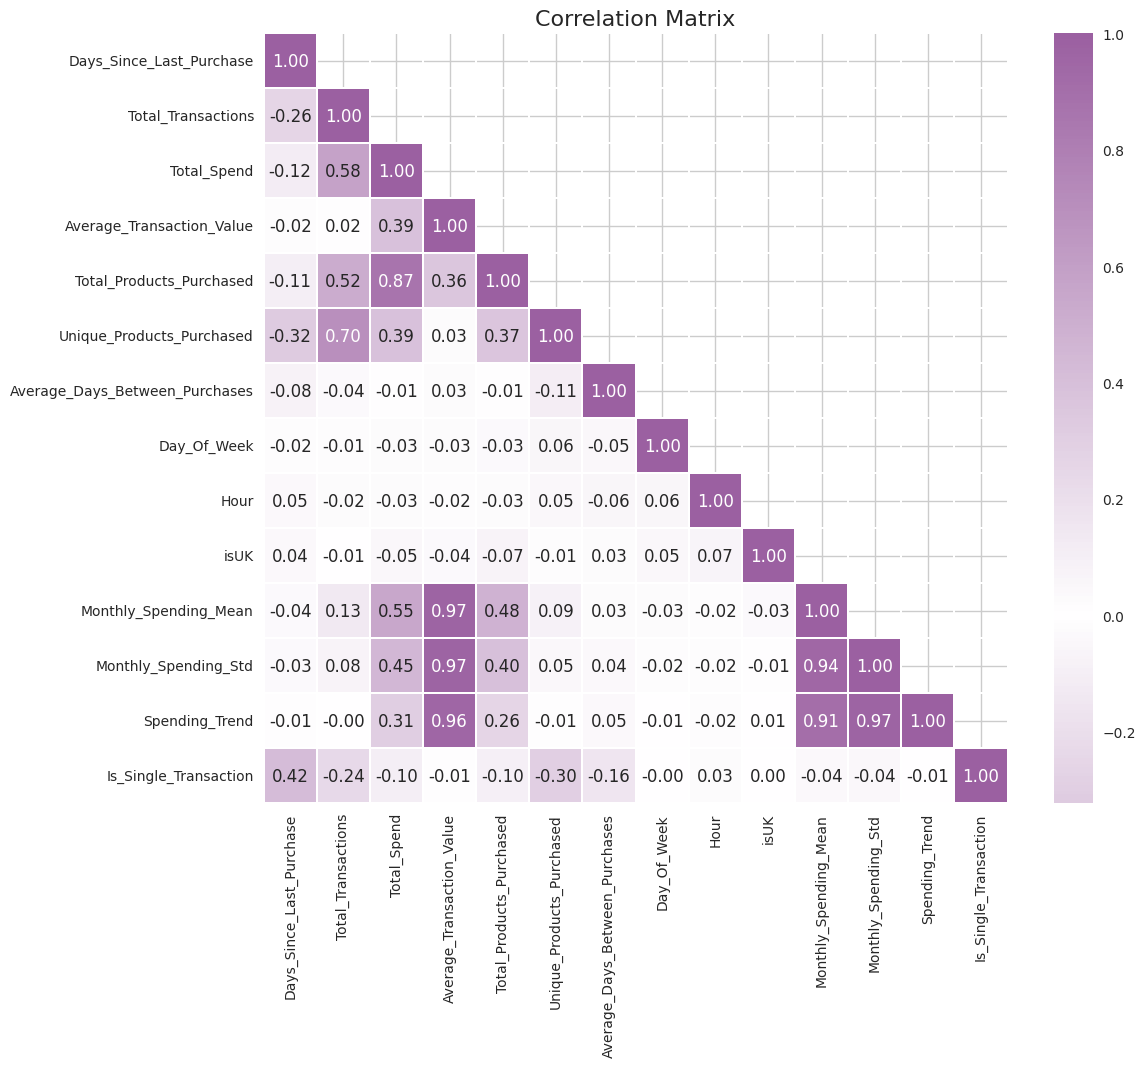

In [30]:
# Reset background style
sns.set_style('whitegrid')

# Compute the correlation matrix excluding 'Customer ID', 'Day_Of_Week_Name', 'TimeOfDay' columns
corr = customers.drop(columns=['Customer ID', 'Day_Of_Week_Name', 'Time_Of_Day']).corr()

# Define custom color map
correlation_color = '#9B60A1'  
colors = [correlation_color, 'white', correlation_color] 
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Draw the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

<a id="Scaler"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 5.1 |</span><span style='color:#9B60A1;'> Scaling Customers DataFrame </span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [31]:
def scaler(df, drop_columns, exclude_columns):
    scaler = StandardScaler()
    df_copy = df.copy()
    df_copy.drop(columns=drop_columns, inplace=True)
    columns_to_scale = df_copy.columns.difference(exclude_columns)
    df_copy[columns_to_scale] = scaler.fit_transform(df_copy[columns_to_scale])
    return df_copy
    
customers_scaled = scaler(customers, ['Day_Of_Week_Name', 'Time_Of_Day'], ['Customer ID'])
customers_scaled

,Customer ID,Days_Since_Last_Purchase,Total_Transactions,Total_Spend,Average_Transaction_Value,Total_Products_Purchased,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,isUK,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Is_Single_Transaction
0,12346,0.601787,-0.225581,9.994268,23.728491,15.296612,-0.489192,0.416484,-1.367858,0.191672,0.310931,20.162253,26.307708,17.041847,-0.567655
1,12347,-0.940866,0.034643,0.125059,0.166495,0.114659,0.377317,-0.186183,-0.832843,0.637187,-3.216151,0.046859,0.015793,-0.010553,-0.567655
2,12348,-0.592217,-0.160525,-0.090182,-0.009512,0.087214,-0.497772,0.154226,-1.367858,0.637187,-3.216151,-0.065190,-0.022335,-0.016332,-0.567655
3,12349,-0.864450,-0.225581,0.044649,0.358615,-0.025278,0.480269,-0.063325,0.237188,-1.590390,-3.216151,0.169582,0.107048,0.085594,-0.567655
4,12350,0.530147,-0.420749,-0.180156,-0.032442,-0.174502,-0.566406,-0.285293,-0.297828,1.528218,-3.216151,-0.079923,-0.077745,-0.011291,1.761633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,18283,-0.936090,0.945425,-0.024217,-0.140278,-0.019956,2.307660,-0.247124,0.237188,0.191672,0.310931,-0.121214,-0.035080,-0.008474,-0.567655
5872,18284,1.108044,-0.420749,-0.172439,0.040067,-0.143510,-0.472034,-0.285293,-1.367858,-0.699359,0.310931,-0.033572,-0.077745,-0.011291,1.761633
5873,18285,2.201751,-0.420749,-0.174681,0.018996,-0.179929,-0.609303,-0.285293,-0.297828,-1.144875,0.310931,-0.047278,-0.077745,-0.011291,1.761633
5874,18286,1.322965,-0.290637,-0.110235,0.064857,-0.129944,-0.137441,-0.087381,0.772203,-0.699359,0.310931,-0.017844,0.030158,0.035174,-0.567655


<a id="Clustring"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#9B60A1; font-size:200%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 6 |</span><span style='color: #9B60A;'> K-means Clustring</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

<a id="PCA"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 6.1 |</span><span style='color:#9B60A1;'> Applying PCA for Finding Optimal Number of Clusters </span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [32]:
# Finally set Customer ID as the index column
customers_scaled.set_index('Customer ID', inplace=True)

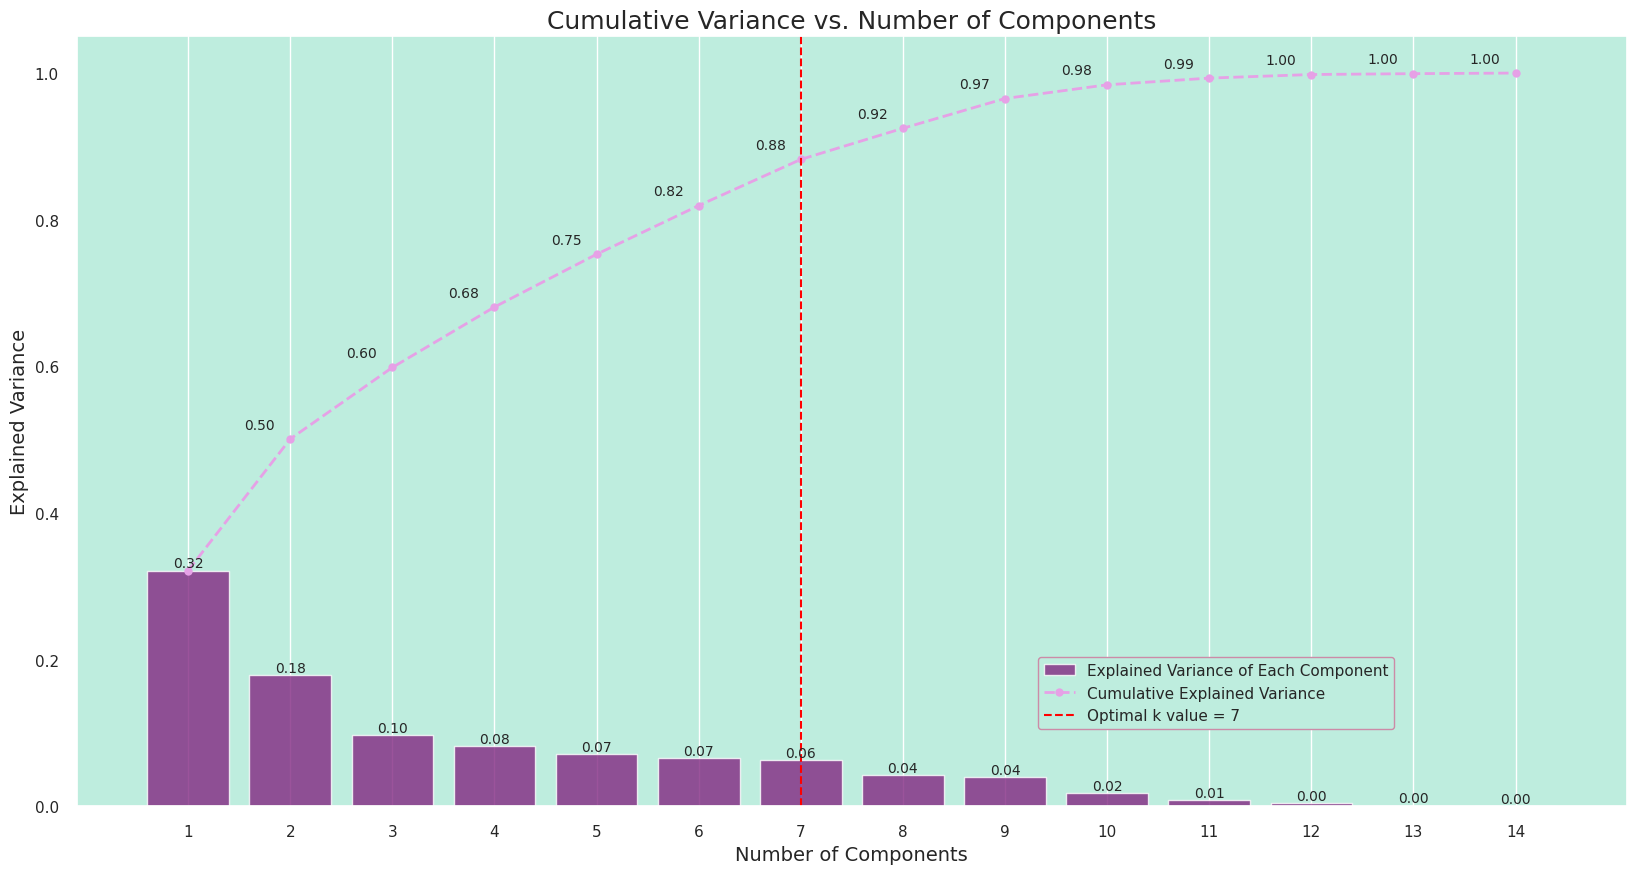

In [33]:
# Apply PCA
pca = PCA().fit(customers_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 7)
optimal_k = 7

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#beedde'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#911991',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#e6a1e6', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#cc8ba7')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [36]:
# Create a PCA object with 7 components
pca = PCA(n_components=7)

# Fit and transform the scaled data to the new PCA dataframe
customers_pca = pca.fit_transform(customers_scaled)

# Create a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customers_pca = pd.DataFrame(customers_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Add the Customer ID index back to the new PCA dataframe
customers_pca.index = customers_scaled.index

In [37]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top_n(column, n=3, color = "#eed7fa"):
    top = column.abs().nlargest(n).index
    return [f"background-color: {color}" if i in top else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customers_scaled.columns)

pc_df.style.apply(highlight_top_n, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Days_Since_Last_Purchase,-0.066386,0.293235,0.508115,0.092382,0.227610,0.083032,0.137924
Total_Transactions,0.165640,-0.499168,0.127414,0.003095,0.079337,0.026943,-0.055156
Total_Spend,0.332950,-0.289118,0.260151,0.134731,0.156327,0.077838,0.149983
Average_Transaction_Value,0.426627,0.236294,-0.075435,-0.046903,-0.067700,-0.030303,-0.044977
Total_Products_Purchased,0.310478,-0.288008,0.273520,0.163333,0.154148,0.073698,0.180771
Unique_Products_Purchased,0.133077,-0.476026,0.022175,-0.180214,-0.099794,-0.060831,-0.132592
Average_Days_Between_Purchases,0.014330,0.027936,-0.454762,0.222645,0.533585,0.089864,0.586390
Day_Of_Week,-0.014085,-0.017071,0.026573,-0.570855,-0.291131,0.633496,0.428674
Hour,-0.016531,0.005239,0.160004,-0.554060,0.118417,-0.709999,0.371282
isUK,-0.022511,0.029013,-0.028329,-0.458184,0.698692,0.230442,-0.478439


<a id="Elbow"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 6.3 |</span><span style='color:#9B60A1;'> Applying Elbow Method for Finding Optimal Number of Clusters</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

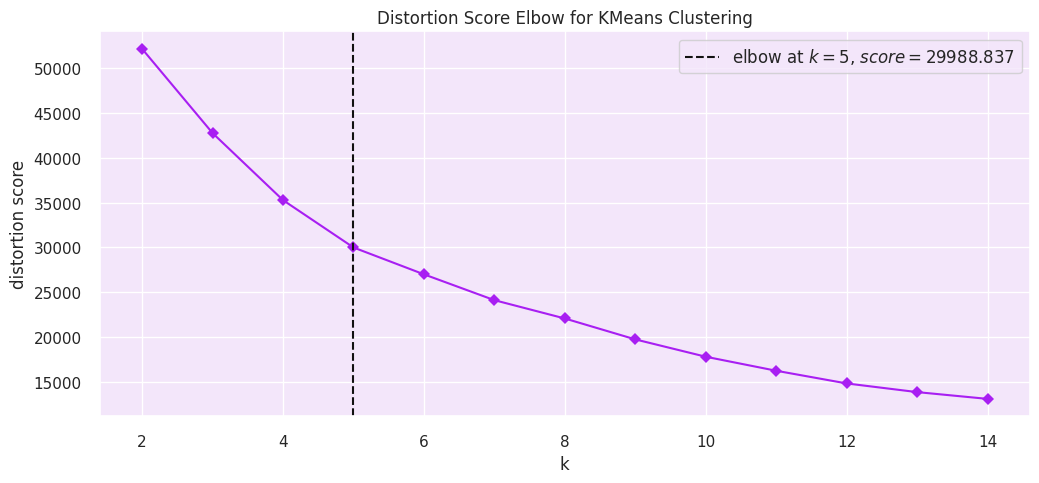

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#f3e6fa'})

# Set the color palette for the plot
sns.set_palette(['#a81ff2']) 

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=42)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customers_pca)

# Finalize and render the figure
visualizer.show()

<a id="Elbow"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 6.4 |</span><span style='color:#9B60A1;'> Silhoutte Analysis for Finding Optimal Number of Clusters</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

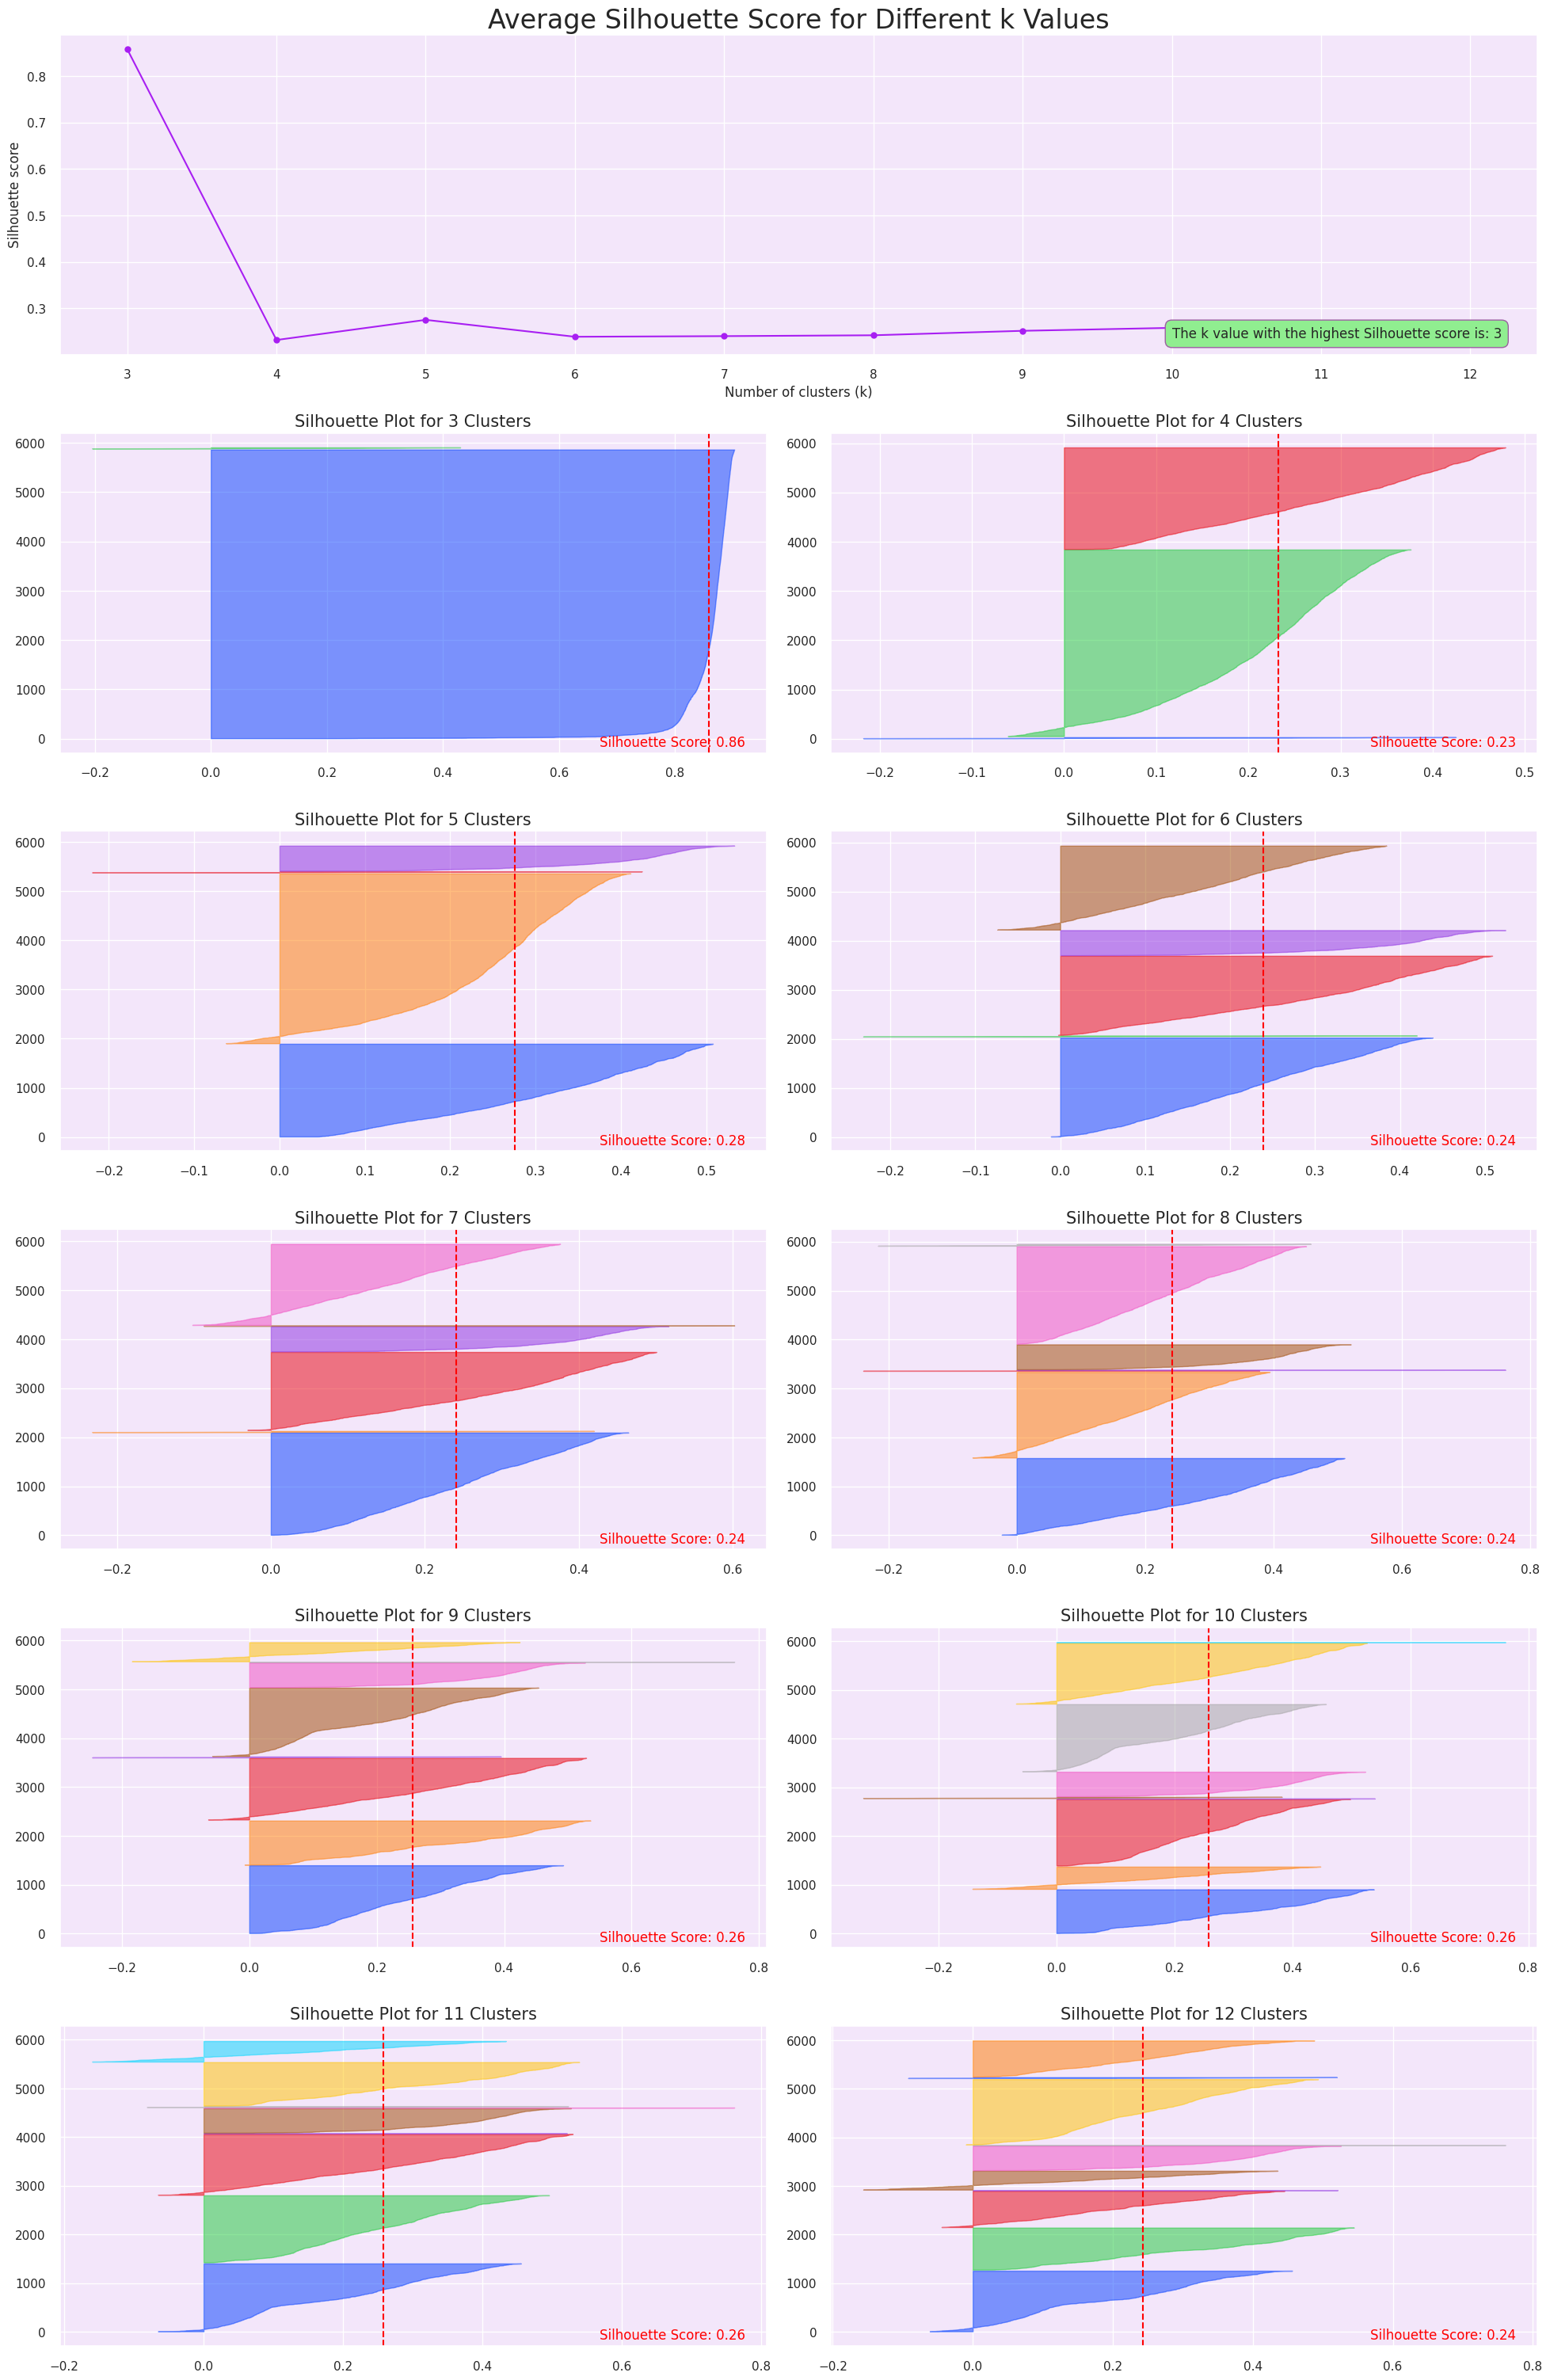

In [39]:
def silhouette_analysis(df, start, stop, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop - start + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['#9B60A1'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start, stop + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start, stop + 1), silhouette_scores, marker='o')
    plt.xticks(range(start, stop + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=24)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='lightgreen', edgecolor='#9B60A1', boxstyle='round, pad=0.5'))
             

    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start, stop + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

silhouette_analysis(customers_pca, 3, 12, figsize=(20, 50))

In [40]:
customers_pca_copy = customers_pca.copy()

In [41]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=42)
kmeans.fit(customers_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels 
label_mapping = {v: k for k, v in {4: 3, 3: 2, 2: 1, 1: 0, 0: 4}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customers['cluster'] = new_labels

In [42]:
customers.head()

,Customer ID,Days_Since_Last_Purchase,Total_Transactions,Total_Spend,Average_Transaction_Value,Total_Products_Purchased,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Day_Of_Week_Name,Hour,Time_Of_Day,isUK,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Is_Single_Transaction,cluster
0,12346,325,4,154536,38634,148454,25,12.880000,0,Monday,13,Afternoon,1,51512.186667,89075.073096,77170.075000,0,3
1,12347,2,8,4921,615,2967,126,1.819005,1,Tuesday,14,Afternoon,0,615.191250,315.773658,3.339405,0,1
2,12348,75,5,1658,331,2704,24,8.066667,0,Monday,14,Afternoon,0,331.680000,187.058966,-22.812000,0,1
3,12349,18,4,3702,925,1626,138,4.073864,3,Thursday,9,Morning,0,925.710000,623.844816,438.430000,0,1
4,12350,310,1,294,294,196,16,0.000000,2,Wednesday,16,Afternoon,0,294.400000,0.000000,0.000000,1,1
